# 예제) 보스턴 집값 예측

In [44]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# matplotlib 설정
plt.rc('font', family = 'AppleGothic')
# plt.rc('font', family = 'Malgun Gothic')   # Windows
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline

## 데이터 불러오기

In [45]:
# 데이터 불러오기
from sklearn.datasets import load_boston

boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [46]:
# 데이터프레임으로 만들기
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

# 종속변수와 독립변수 합치기
df = pd.concat([dfX, dfy], axis=1)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## 데이터 파악

### 독립변수

- CRIM: 범죄율
- INDUS: 비소매상업지역 면적 비율
- NOX: 일산화질소 농도
- RM: 주택당 방 수
- LSTAT: 인구 중 하위 계층 비율
- B: 인구 중 흑인 비율
- PTRATIO: 학생/교사 비율
- ZN: 25,000 평방피트를 초과 거주지역 비율
- CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0
- AGE: 1940년 이전에 건축된 주택의 비율
- RAD: 방사형 고속도로까지의 거리
- DIS: 직업센터의 거리
- TAX: 재산세율

### 종속변수
- MEDV: 보스턴 506개 타운의 1978년 주택 가격 중앙값 (단위 1,000 달러)

In [47]:
# 결측치 확인
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

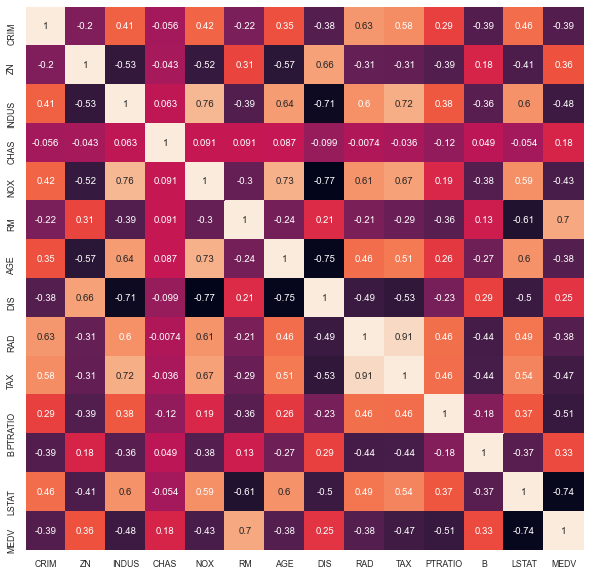

In [48]:
# 상관 관계 행렬
df_corr = df.corr()

# 히트맵
plt.figure(figsize = (10,10))
sns.set(font_scale = 0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [49]:
# 종속변수 MEDV와 상관계수가 높은 순서대로 확인
df_corr.loc[:"LSTAT", "MEDV"].abs().sort_values(ascending = False)

LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: MEDV, dtype: float64

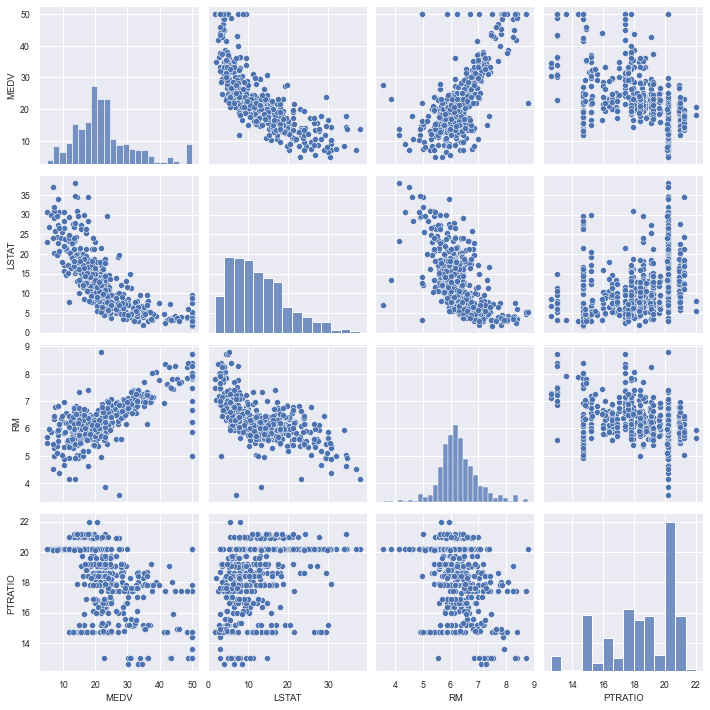

In [50]:
sns.pairplot(df[["MEDV", "LSTAT", "RM", "PTRATIO"]])
plt.show()

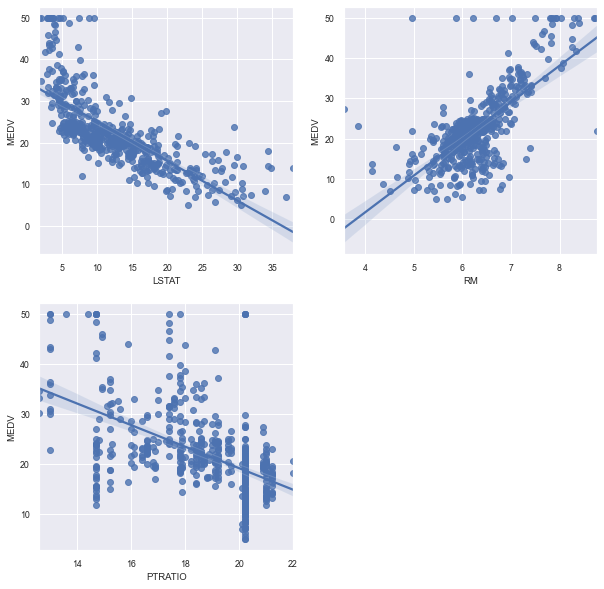

In [51]:
plt.figure(figsize = (10, 10))
for idx, col in enumerate(["LSTAT", "RM", "PTRATIO"]):
    ax1 = plt.subplot(2, 2, idx+1)
    sns.regplot(x = col, y = "MEDV", data = df, ax = ax1)
plt.show()

## 모형 적합

In [52]:
# 상관계수 높은 독립변수 3개 가져오기
dfX_2 = dfX.loc[:, ["LSTAT", "RM", "PTRATIO"]]
dfX_2 = sm.add_constant(dfX_2)

# 회귀모형 적합
model = sm.OLS(dfy, dfX_2)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     353.3
Date:                Tue, 13 Jul 2021   Prob (F-statistic):          2.69e-123
Time:                        07:32:08   Log-Likelihood:                -1553.0
No. Observations:                 506   AIC:                             3114.
Df Residuals:                     502   BIC:                             3131.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.5671      3.913      4.745      0.0

## 추정된 회귀모형식
$$
\begin{align}
\text{MEDV} &= 18.5671 - 0.5718\, \text{LSTAT} + 4.5718\, \text{RM} - 0.9307\, \text{PTRATIO} \\
\text{주택가격} &= 18.5671 - 0.5718\, \text{인구 중 하위 계층 비율} + 4.5718\, \text{주택당 방 수} - 0.9307\, \text{학생/교사 비율}
\end{align}
$$
